This tutorial is based on:
https://www.kaggle.com/code/paulrohan2020/tf-idf-tutorial/notebook

# TF-IDF tutorial

Traditional (count-based) feature engineering has strategies effective methods for extracting features from text for textual data, these these features belong to a family of models popularly known as the **Bag of Words model**. BoW includes:
* term frequencies
* TF-IDF (term frequency-inverse document frequency)
* N-grams, topic models. 

However, the inherent nature of the model being just a bag of unstructured words, has disadvantage where it loses the additional information like the *semantics, structure, sequence, and context* around nearby words in each text document. 

In [11]:
# here is a simple example for two documents. 

doc_a = "this document is first document"
doc_b = "this document is the second document"

# split the documents into words
bag_of_words_a = doc_a.split(" ")
bag_of_words_b = doc_b.split(" ")

# get the unique words in the two documents 
uniuqe_words_set = set(bag_of_words_a).union(set(bag_of_words_b))
print(uniuqe_words_set) # {'first', 'second', 'is', 'document', 'the', 'this'}

# create a dictionary to hold the word counts for each document
dict_a = dict.fromkeys(uniuqe_words_set, 0) # initialize the word counts to zero
# print(dict_a) # {'first': 0, 'second': 0, 'is': 0, 'document': 0, 'the': 0, 'this': 0}


for word in bag_of_words_a:
    dict_a[word] += 1 # count the word occurences in the first document

# print(dict_a) # {'first': 1, 'second': 0, 'is': 1, 'document': 1, 'the': 0, 'this': 1}

# do the same for the second document
dict_b = dict.fromkeys(uniuqe_words_set, 0)
print(f'1st document: {dict_b}') # {'first': 0, 'second': 0, 'is': 0, 'document': 0, 'the': 0, 'this': 0}

for word in bag_of_words_b:
    dict_b[word] += 1 # count the word occurences in the second document

print(f'2nd document: {dict_b}') # {'first': 0, 'second': 1, 'is': 1, 'document': 1, 'the': 1, 'this': 1}

{'first', 'second', 'the', 'document', 'this', 'is'}
1st document: {'first': 0, 'second': 0, 'the': 0, 'document': 0, 'this': 0, 'is': 0}
2nd document: {'first': 0, 'second': 1, 'the': 1, 'document': 2, 'this': 1, 'is': 1}


## Term Frequency (TF)
Term frequency in any document vector is denoted by the raw frequency value of that term in a particular document. Mathematically it can be represented as follows:
    
$$tf_{i,j} = \frac{f_{i,j}}{\sum_{k}f_{k,j}}$$

        where $f_{i,j}$ is the raw frequency of the term $i$ in the document $j$ and $\sum_{k}f_{k,j}$ is the total number of terms in the document $j$.

Sometimes you can also normalize the absolute raw frequency using logarithms or averaging the frequency. We use the raw frequency in our computations. So, in other words, The number of times a word appears in a document divded by the total number of words in the document. Every document has its own term frequency.

In [19]:
# A function to calculate the term frequency of a word in a document
def compute_term_frequency(word_count_dict, bag_of_words):
    term_frequency_dictionary = {} # initialize the term frequency dictionary
    length_of_bag_of_words = len(word_count_dict) # get the length of the bag of words
    
    for word, count in word_count_dict.items():
        term_frequency_dictionary[word] = count / float(length_of_bag_of_words) # calculate the term frequency
        
    return term_frequency_dictionary 

# Implement the term frequency function
print(f'1st document: {compute_term_frequency(dict_a, bag_of_words_a)}') # {'first': 0.166, 'second': 0.0, 'the': 0.0, 'document': 0.33, 'this': 0.1666, 'is': 0.166}
print(f'2nd document: {compute_term_frequency(dict_b, bag_of_words_b)}') # {'first': 0.0, 'second': 0.166, 'the': 0.166, 'document': 0.33, 'this': 0.166, 'is': 0.166}

1st document: {'first': 0.16666666666666666, 'second': 0.0, 'the': 0.0, 'document': 0.3333333333333333, 'this': 0.16666666666666666, 'is': 0.16666666666666666}
2nd document: {'first': 0.0, 'second': 0.16666666666666666, 'the': 0.16666666666666666, 'document': 0.3333333333333333, 'this': 0.16666666666666666, 'is': 0.16666666666666666}


## Inverse Document Frequency (IDF)
Inverse document frequency denoted by **idf** is the inverse of the document frequency for each term and is computed by dividing the total number of documents in our corpus by the document frequency for each term and then applying logarithmic scaling to the result.

In some implementation, people will be adding 1 to the document frequency for each term to indicate that we also have one more document in our corpus, which essentially has every term in the vocabulary. This is to prevent potential division by zero errors and smoothen the inverse document frequencies. This is to avoid ignoring terms that might have zero idf. 

Inverse Document Frequency, measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones
Mathematically, our implementation for idf can be represented as follows:
$$idf(t,D)=log\frac{N}{df(t,D)}$$
    
*where $N$ is the total number of documents in our corpus and $df(t,D)$ is the document frequency of the term $t$ in our corpus $D$.*

The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the weight of rare words across all documents in the corpus.

Consider a document containing 100 words wherein the word cat appears 3 times. The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

Following Python code can compute Inverse document frequency

In [23]:
import math 

# A function to calculate the inverse document frequency of a word in a document
def compute_inverse_frequency(full_doc_list): 
    
    idf_dict = {} # initialize the inverse document frequency dictionary
    length_of_doc_list = len(full_doc_list) # get the length of the full document list
    
    idf_dict = dict.fromkeys(full_doc_list[0].keys(), 0) # initialize the idf dictionary with the keys from the first document
    for word, value in idf_dict.items():
        idf_dict[word] = math.log(length_of_doc_list / float(value)+1) # calculate the inverse document frequency, add 1 to avoid division by zero. 
        
    return idf_dict 

# Implement the inverse document frequency function
final_idf_dict = compute_inverse_frequency([dict_a, dict_b])
print(f'Full document list: {final_idf_dict}') # {'first': 0.69, 'second': 0.69, 'the': 0.69, 'document': 0.693, 'this': 0.693, 'is': 0.693}

{'first': 0.6931471805599453, 'second': 0.6931471805599453, 'the': 0.6931471805599453, 'document': 0.6931471805599453, 'this': 0.6931471805599453, 'is': 0.6931471805599453}


# sk-learn's implementation of tf-idf
Sklearn does couple of tweaks in its implementation of TF-IDF vectorizer, so to replicate the exact results our custom TF-DF would need to add following

Sklearn formula of idf is different from the standard textbook formula. Here the constant "1" is added to the numerator and denominator of the idf as if an extra document was seen containing every term in the collection exactly once, which prevents zero divisions.

Sklearn has its vocabulary generated from idf sorted in alphabetical order

The final output of sklearn tf-idf vectorizer is a sparse matrix

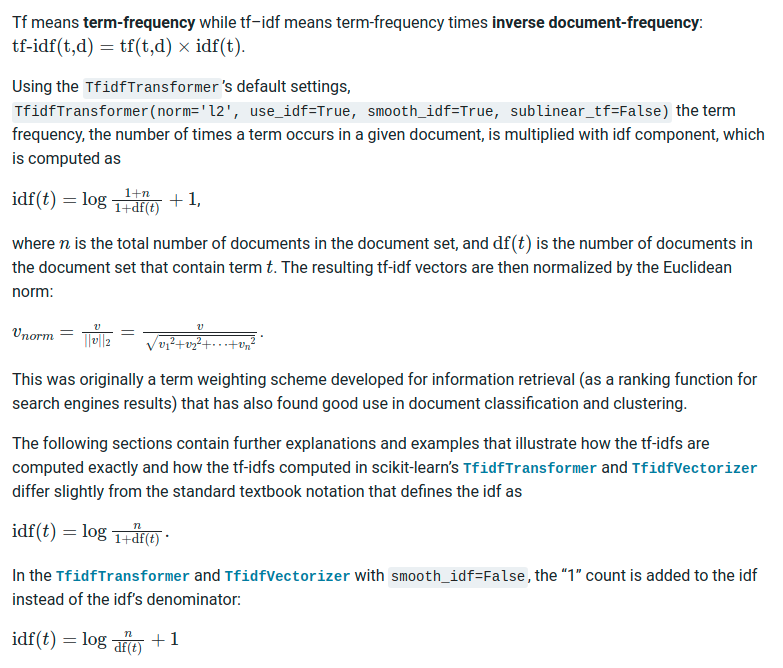

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

corpus_1 = [
     'The quick brown fox jumps over the lazy dog.',
     'She sells seashells by the seashore.',
     'Peter Piper picked a peck of pickled peppers.',
     'The cat in the hat came back.',
     'How much wood would a woodchuck chuck if a woodchuck could chuck wood?',
     'I like to eat apples and bananas.',
     'To be or not to be, that is the question.',
     'It was the best of times, it was the worst of times.',
     'Four score and seven years ago our fathers brought forth on this continent a new nation.',
     'The only way to do great work is to love what you do.',
]

vectorizer.fit(corpus_1) # fit the corpus into the vectorizer

skl_tf_idf_vectorized = vectorizer.transform(corpus_1) # transform the corpus into a tf-idf vectorized form


print(f'sparse matrix: \n{skl_tf_idf_vectorized}\n') # As the final output of sklearn tf-idf vectorizer is a sparse matrix to save storage space
# To visually understand the output better, we need to convert the sparse output matrix to dense matrix with toarray()
print(f'dens matrix: \n{skl_tf_idf_vectorized.toarray()}\n') 
# print(skl_tf_idf_vectorized[0])

# As above Even more clear way to visually inspect the output is to convert it to a pandas dataframe
# So below I will convert that to a dataframe and then use todense()

# step 1: convert the sparse matrix to a dense matrix
skl_tfdf_output = skl_tf_idf_vectorized[0] # get the first row of the tf-idf vectorized output

# step 2: convert the dense matrix to a dataframe
df_tfdf_sklearn = pd.DataFrame(skl_tfdf_output.T.todense(), index=vectorizer.get_feature_names_out(), columns=['tf-idf']) # convert the sparse matrix to a dense matrix and then to a dataframe

# step 3: sort the dataframe by tf-idf values
df_tfdf_sklearn.sort_values(by=['tf-idf'], ascending=False)


sparse matrix: 
  (0, 58)	0.3760222913768733
  (0, 50)	0.35022589371263263
  (0, 42)	0.35022589371263263
  (0, 30)	0.35022589371263263
  (0, 29)	0.35022589371263263
  (0, 21)	0.35022589371263263
  (0, 16)	0.35022589371263263
  (0, 8)	0.35022589371263263
  (1, 58)	0.23344363784227976
  (1, 56)	0.43485723357234446
  (1, 54)	0.43485723357234446
  (1, 53)	0.43485723357234446
  (1, 52)	0.43485723357234446
  (1, 9)	0.43485723357234446
  (2, 48)	0.3856821837899059
  (2, 47)	0.3856821837899059
  (2, 46)	0.3856821837899059
  (2, 45)	0.3856821837899059
  (2, 44)	0.3856821837899059
  (2, 43)	0.3856821837899059
  (2, 37)	0.3278650921374452
  (3, 58)	0.43284372103034474
  (3, 26)	0.40314918161013424
  (3, 23)	0.40314918161013424
  (3, 11)	0.40314918161013424
  :	:
  (8, 59)	0.2606195122358012
  (8, 55)	0.2606195122358012
  (8, 51)	0.2606195122358012
  (8, 41)	0.2606195122358012
  (8, 38)	0.2606195122358012
  (8, 35)	0.2606195122358012
  (8, 34)	0.2606195122358012
  (8, 20)	0.2606195122358012
  (8, 

,tf-idf
the,0.376022
jumps,0.350226
over,0.350226
dog,0.350226
quick,0.350226
...,...
much,0.000000
nation,0.000000
new,0.000000
and,0.000000
